In [1]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('BNB-USD.csv')

data['Date'] = pd.to_datetime(data['Date'])


data.set_index('Date', inplace=True)


data.index.freq = 'D'

In [21]:
data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-01,10.356931,11.607489,10.325634,11.393217,11.393217,117838677
2019-03-02,11.384693,11.915753,10.960816,11.869744,11.869744,120807894
2019-03-03,11.845305,11.964979,11.352064,11.537903,11.537903,89868246
2019-03-04,11.538013,11.599405,11.070543,11.545945,11.545945,89421231
2019-03-05,11.520388,13.841443,11.520388,13.811967,13.811967,237026335


In [33]:
train = data[:'2024-08-30']
test = data['2019-08-31':]


In [34]:
lags = 1

In [35]:
model = VAR(train)
results = model.fit(lags)

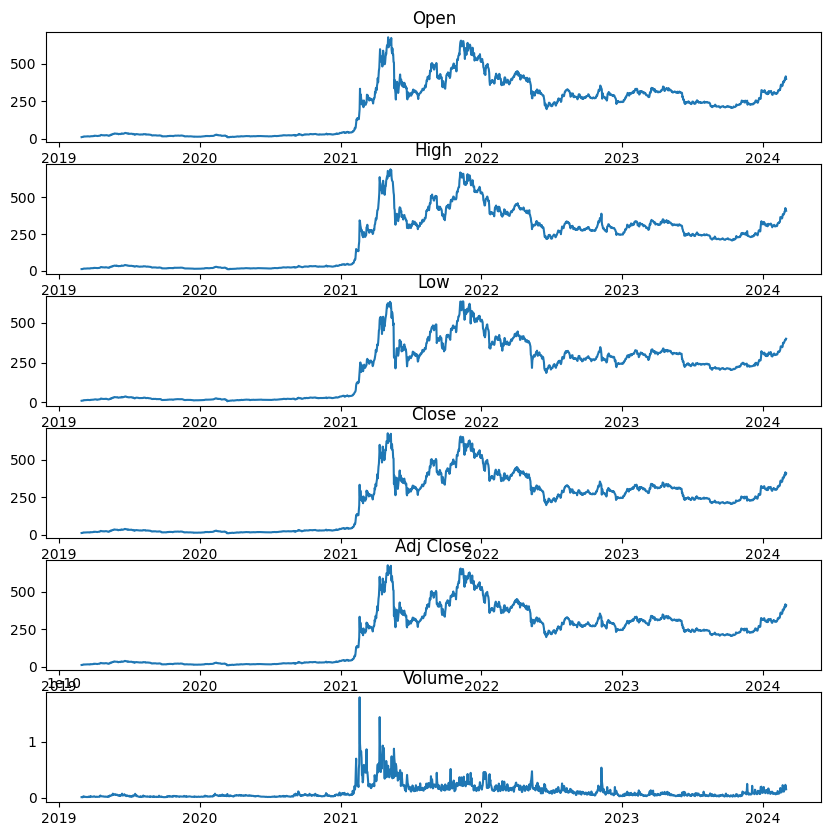

In [36]:
results.plot()
plt.show()

In [37]:
forecast = results.forecast(y=train.values[-lags:], steps=len(test))

In [39]:
print(forecast)

[[4.07877441e+02 4.15612797e+02 3.98154805e+02 4.05998187e+02
  4.05998187e+02 1.66592569e+09]
 [4.06109727e+02 4.16087916e+02 3.94987098e+02 4.05650882e+02
  4.05650882e+02 1.75146163e+09]
 [4.05772316e+02 4.16332850e+02 3.93790280e+02 4.05301540e+02
  4.05301540e+02 1.80126532e+09]
 ...
 [3.10663270e+02 3.19517077e+02 3.00858303e+02 3.10585057e+02
  3.10585057e+02 1.57486734e+09]
 [3.10657858e+02 3.19511509e+02 3.00853082e+02 3.10579661e+02
  3.10579661e+02 1.57484289e+09]
 [3.10652459e+02 3.19505952e+02 3.00847872e+02 3.10574276e+02
  3.10574276e+02 1.57481850e+09]]


In [40]:
print("RMSE:", rmse(test, forecast))

RMSE: [2.12430024e+02 2.18749625e+02 2.05199307e+02 2.12136547e+02
 2.12136547e+02 1.52986089e+09]


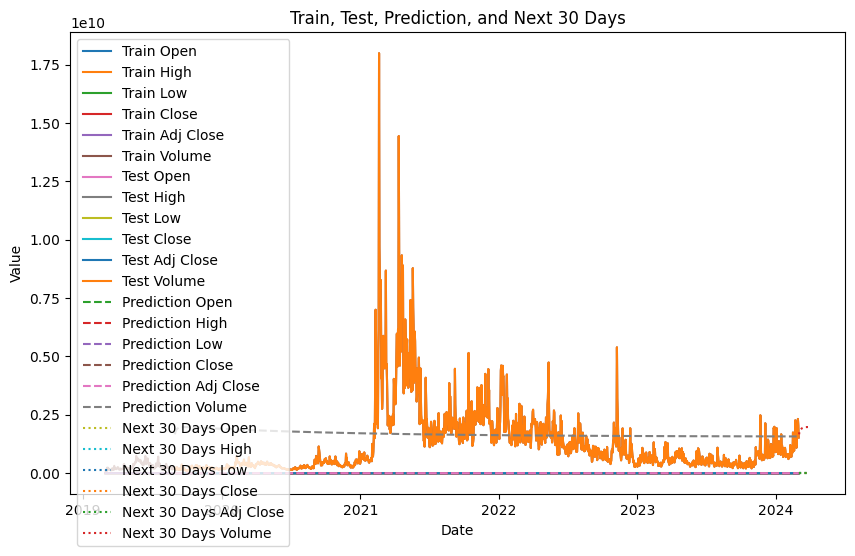

In [74]:

# Vẽ biểu đồ dữ liệu huấn luyện
plt.figure(figsize=(10, 6))
for col in train.columns:
    plt.plot(train.index, train[col], label='Train ' + col)

# Vẽ biểu đồ dữ liệu kiểm tra
for col in test.columns:
    plt.plot(test.index, test[col], label='Test ' + col)

# Vẽ biểu đồ dữ liệu dự đoán
for col in forecast_df.columns:
    plt.plot(forecast_df.index, forecast_df[col], linestyle='dashed', label='Prediction ' + col)

# Tạo dữ liệu cho 30 ngày tiếp theo
next_30_days_index = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
next_30_days = pd.DataFrame(index=next_30_days_index, columns=data.columns)
next_30_days_forecast = results.forecast(y=test.values[-lags:], steps=30)
for i, col in enumerate(next_30_days.columns):
    next_30_days[col] = next_30_days_forecast[:, i]

# Vẽ biểu đồ dữ liệu cho 30 ngày tiếp theo
for col in next_30_days.columns:
    plt.plot(next_30_days.index, next_30_days[col], linestyle='dotted', label='Next 30 Days ' + col)

# Thêm chú thích vào biểu đồ (sau khi đã vẽ hết dữ liệu)
plt.title('Train, Test, Prediction, and Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()